In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
image = cv.imread("5.jpg", 0)
image.shape

(172, 297)

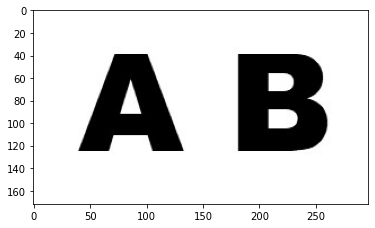

In [3]:
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show(block = True)

In [6]:
sum_0 = image.sum(axis = 0)

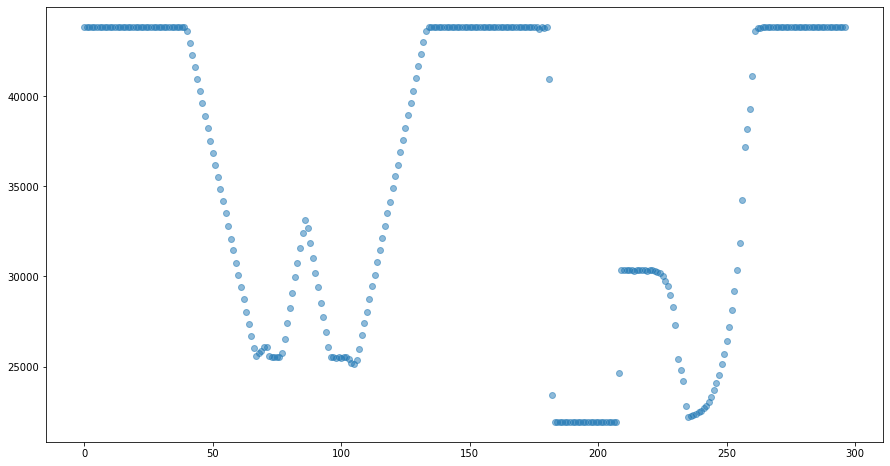

In [7]:
plt.figure(figsize = (15, 8))
plt.scatter(range(len(sum_0)), sum_0, alpha = 0.5)

In [8]:
def model1(l):
    maximum = max(l)
    cutout_dip = []
    cutout_up = []
    
    for i in range(len(l)):
        if (i + 1) != len(l):
            if l[i] == maximum:
                if (l[i + 1] < maximum):
                    cutout_dip.append(i)
            
            if l[i] < maximum:
                if (l[i + 1] == maximum):
                    cutout_up.append(i)
    return cutout_up, cutout_dip

In [9]:
cutout_up, cutout_dip = model1(sum_0)
cutout_up, cutout_dip

([135, 263], [39, 175])

In [10]:
def model2(image, cutout_up, cutout_dip):
    cutout_images = []
    for up, dip in zip(cutout_up, cutout_dip):
        temp = image[:, dip : up]
        cutout_images.append(temp)
    return cutout_images

In [11]:
cutout_images = model2(image, cutout_up, cutout_dip)

In [12]:
len(cutout_images)

2

image number :  1


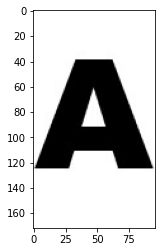

image number :  2


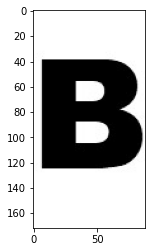

In [11]:
for i in range(len(cutout_images)):
    print("image number : ", i + 1)
    plt.imshow(cv.cvtColor(cutout_images[i], cv.COLOR_BGR2RGB))
    plt.show(block = True)

### axis = 1

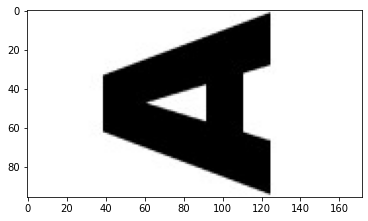

In [13]:
image_T = cutout_images[0].T
plt.imshow(cv.cvtColor(image_T, cv.COLOR_BGR2RGB))
plt.show(block = True)

In [14]:
sum_1 = image_T.sum(axis = 0)

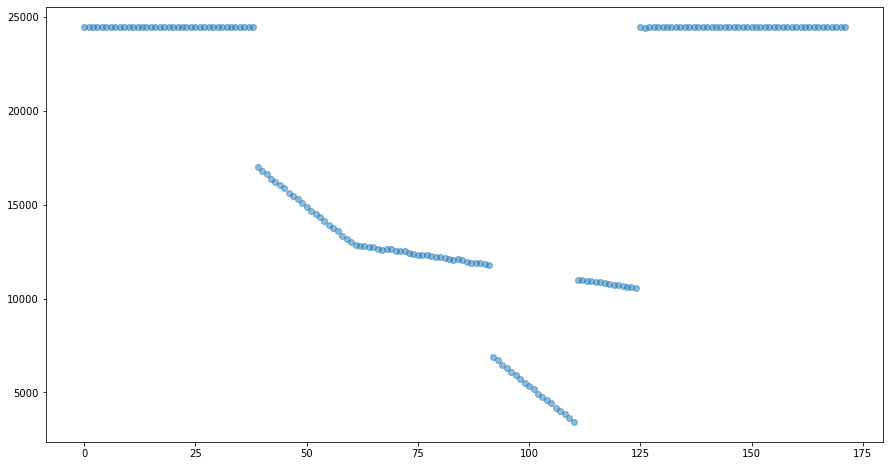

In [15]:
plt.figure(figsize = (15, 8))
plt.scatter(range(len(sum_1)), sum_1, alpha = 0.5)

In [16]:
cutout_up, cutout_dip = model1(sum_1)
cutout_up, cutout_dip

([127], [31])

In [17]:
cutout_images = model2(image_T, cutout_up, cutout_dip)

In [18]:
len(cutout_images)

1

image number :  1


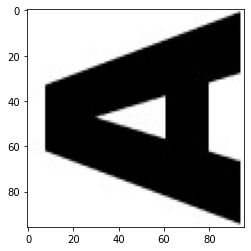

In [19]:
for i in range(len(cutout_images)):
    print("image number : ", i + 1)
    plt.imshow(cv.cvtColor(cutout_images[i], cv.COLOR_BGR2RGB))
    plt.show(block = True)